<a href="https://colab.research.google.com/github/usadhana025/Hands_on_ml/blob/master/Notebooks/mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
mnist=fetch_openml('mnist_784',as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
X,y=mnist.data,mnist.target

In [6]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
  image=image_data.reshape(28,28)
  plt.imshow(image,cmap='binary')
  plt.axis("off")

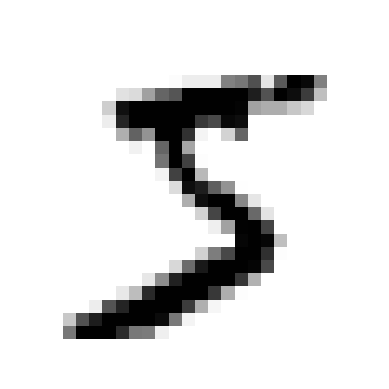

In [10]:
some_digit=X[0]
plot_digit(some_digit)
plt.show()

In [11]:
y[0]

'5'

In [12]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

Designing Binary classifier to detect 5 and non 5 in dataset, let's create a target for that

In [13]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

## 1. Stocastic Gradient Decent Classifer

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])


array([ True])

## Performance Measure

We can evaluate the prediction using K fold cross validation cross_val_score() but accuracy would not bea a accurate measure as data has only 10% of the digits as 5 and hence data is skewed .
Another way is we can use confusion Matrix:
General idea behind confusion matrix is , how many time class A is claasifed as class B and vice versa.

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

Now, using confusion matrix, by passing target and prediction to the function

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train_5,y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

Confusion Matrix :
```
[true negatives, False positives
 false negatives,True positives]
```
Confusion matrix gives lot of information, I am interested in knowing accuracy of positive prediction , called **Precision** of the classifier.


```
Precision=TP/TP+FP
```
Precision will ignore everything except the positive instances, we also need to calculate True Positive Rate/TPR/Recall/Sensivity of the model
It will give the ratio of positive instances corrected detected by the classifier.

```
recall=TP/TP+FN
```




In [20]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

This indicate, when it claims as 5 , it is correct only 83.7% of the time and it only detects 65.1% of the 5's

It is convinient to combine precision and recall, we call it F1 score , its a harmonic mean of precision and recall.Harmonic mean will give more weight for low values. So , F1 score will only be high if both Precision and Recall are high.


```
F1=TP/TP+[(FN+FP)/2]
```



In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

F1 score favors the classifier that has similar precision and recall.but sometime we need high precision(finding safe videos for kids) or sometime high recall(catching shoplifter).
Unfortunatly, we cant have both.For high precision, recall would be low, for high recall precision would be low .This is called precision/recall trade-off